In [2]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [16]:
numpy.random.seed(7)

In [32]:
dataframe = pandas.read_csv('Sindh_Updated.csv', engine='python')
dataframe
# dataframe.drop('Last_Update', axis=1, inplace=True)
dataframe.drop('Province_State', axis=1, inplace=True)
dataframe.drop('Date', axis=1, inplace=True)
dataset = dataframe.values
# dataset = dataset.astype('float32')

In [33]:
dataset.shape
# dataset

(183, 12)

In [10]:
scaler = MinMaxScaler(feature_range=(0, 9))
dataset = scaler.fit_transform(dataset)

In [34]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

122 61


In [35]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [49]:
look_back = 7
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [50]:
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [51]:
trainX[1]

array([[89225., 89225., 90721., 94528., 96236., 97626., 99362.]])

In [52]:
trainY[1]

100900.0

In [53]:
look_back

7

In [48]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
114/114 - 43s - loss: 16673176576.0000
Epoch 2/100
114/114 - 0s - loss: 16673103872.0000
Epoch 3/100
114/114 - 0s - loss: 16673030144.0000
Epoch 4/100
114/114 - 0s - loss: 16672956416.0000
Epoch 5/100
114/114 - 0s - loss: 16672883712.0000
Epoch 6/100
114/114 - 0s - loss: 16672809984.0000
Epoch 7/100
114/114 - 0s - loss: 16672733184.0000
Epoch 8/100
114/114 - 0s - loss: 16672660480.0000
Epoch 9/100
114/114 - 0s - loss: 16672586752.0000
Epoch 10/100
114/114 - 0s - loss: 16672510976.0000
Epoch 11/100
114/114 - 0s - loss: 16672441344.0000
Epoch 12/100
114/114 - 0s - loss: 16672366592.0000
Epoch 13/100
114/114 - 0s - loss: 16672290816.0000
Epoch 14/100
114/114 - 0s - loss: 16672219136.0000
Epoch 15/100
114/114 - 0s - loss: 16672142336.0000
Epoch 16/100
114/114 - 0s - loss: 16672067584.0000
Epoch 17/100
114/114 - 0s - loss: 16671996928.0000
Epoch 18/100
114/114 - 0s - loss: 16671926272.0000
Epoch 19/100
114/114 - 0s - loss: 16671849472.0000
Epoch 20/100
114/114 - 0s - loss: 16671

In [29]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
# trainPredict = scaler.inverse_transform(trainPredict)
# trainY = scaler.inverse_transform([trainY])
# testPredict = scaler.inverse_transform(testPredict)
# testY = scaler.inverse_transform([testY])
# calculate root mean squared error
# trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
# print('Train Score: %.2f RMSE' % (trainScore))
# testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
# print('Test Score: %.2f RMSE' % (testScore))

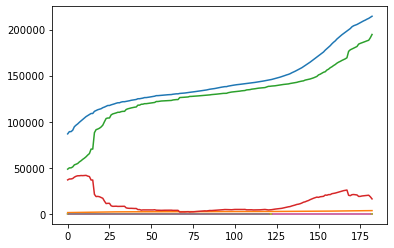

In [30]:
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

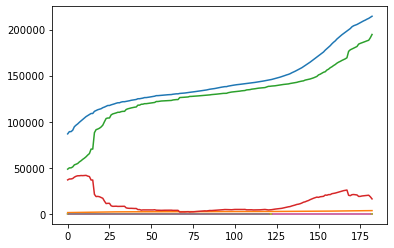

In [31]:
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()